<a href="https://colab.research.google.com/github/VivekSaini11/Machine-Learning-Project/blob/master/Income_Qualification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESCRIPTION**

Identify the level of income qualification needed for the families in Latin America.

**Problem Statement Scenario**:
Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
#importing the data.
train_data=pd.read_csv('train.csv');
test_data=pd.read_csv('test.csv');

In [43]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,1523,94,0,2,0,1,1,0,361,0,1,1,0,0,0,0,0,0,0,0,10,1467,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,82,0,0,0,1,0,0,0,0,0,0,10,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,10,43,0,10,0,10,0,82,43,3
1,9064,73,0,3,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,12,5018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,102,0,0,0,0,0,0,0,1,0,0,10,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,12,67,0,12,0,10,30,102,67,3
2,3948,2245,0,7,0,1,1,0,4721,0,0,0,0,1,1,0,0,0,0,0,11,5017,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,92,0,0,0,0,1,0,0,0,0,1,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,11,92,0,0,0,4,30,92,92,3
3,8017,91,0,4,0,1,1,1,0,0,2,2,1,1,2,1,2,3,3,3,9,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,92,0,0,0,1,0,0,0,0,0,2,14,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,9,17,3,11,2,14,15,92,17,3
4,7984,91,0,4,0,1,1,1,0,0,2,2,1,1,2,1,2,3,3,3,11,5016,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,92,0,0,0,0,1,0,0,0,0,2,14,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,11,37,3,11,2,14,15,92,37,3


In [44]:
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,4399,897,0,4,0,1,1,0,3118,1,1,2,0,1,1,1,1,2,2,2,0,3551,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,7,165,1,0,0,0,0,0,0,0,0,1,21,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,4,2,0,1,21,10,165,4
1,2562,11196,0,4,0,1,1,0,11602,1,1,2,0,1,1,1,1,2,2,2,16,12378,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,7,165,0,0,0,0,0,0,0,1,0,1,21,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,16,41,2,0,1,21,10,165,41
2,21347,11195,0,4,0,1,1,0,11601,1,1,2,0,1,1,1,1,2,2,2,17,12377,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,7,165,0,0,0,0,0,0,0,0,1,1,21,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,17,41,2,0,1,21,10,165,41
3,15791,11194,0,13,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,16,12376,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,20,162,0,0,0,0,0,0,0,1,0,0,14,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,16,59,0,16,0,14,0,162,59
4,15575,122,0,3,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,11,12375,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,1,201,0,0,0,0,1,0,0,0,0,1,6,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,11,18,0,0,1,6,34,201,18


In [45]:
train_data.shape

(9557, 143)

In [46]:
test_data.shape

(23856, 142)

In [47]:
# Count how many null values are existing in columns.
train_data.isnull().sum()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Target             0
Length: 143, dtype: int64

In [48]:
test_data.isnull().sum()

Id                 0
v2a1               0
hacdor             0
rooms              0
hacapo             0
                  ..
SQBhogar_nin       0
SQBovercrowding    0
SQBdependency      0
SQBmeaned          0
agesq              0
Length: 142, dtype: int64

In [49]:
# Understand the type of training data.
train_data.dtypes

Id                 int64
v2a1               int64
hacdor             int64
rooms              int64
hacapo             int64
                   ...  
SQBovercrowding    int64
SQBdependency      int64
SQBmeaned          int64
agesq              int64
Target             int64
Length: 143, dtype: object

In [50]:
# Understand the type of testing data.
test_data.dtypes

Id                 int64
v2a1               int64
hacdor             int64
rooms              int64
hacapo             int64
                   ...  
SQBhogar_nin       int64
SQBovercrowding    int64
SQBdependency      int64
SQBmeaned          int64
agesq              int64
Length: 142, dtype: object

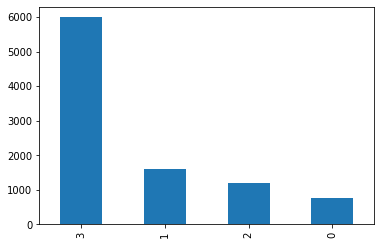

In [51]:
# Identify the output variable.
train_data['Target'].value_counts().plot(kind="bar")

In [52]:
# Check if there are any biases in your dataset.
train_data['Target'].value_counts()

3    5996
1    1597
2    1209
0     755
Name: Target, dtype: int64

In [55]:
# Check if there is a house without a family head.
train_data['parentesco1'].value_counts()

0    6584
1    2973
Name: parentesco1, dtype: int64

In [56]:
# Remove null value rows of the target variable.
train_data['Target'].isnull().sum()

0

In [57]:
# Apply label encoder for train data.
categorical_feature_mask = train_data.dtypes == object
categorical_cols = train_data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
for col in train_data.columns:
    train_data[col] = le.fit_transform(train_data[col])
X_train_features = train_data.drop(['Target'], axis=1)
y_train_label = train_data['Target']
X_train_features

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,1523,94,0,2,0,1,1,0,361,0,1,1,0,0,0,0,0,0,0,0,10,1467,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,20,82,0,0,0,1,0,0,0,0,0,0,10,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,10,43,0,10,0,10,0,82,43
1,9064,73,0,3,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,12,5018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,20,102,0,0,0,0,0,0,0,1,0,0,10,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,12,67,0,12,0,10,30,102,67
2,3948,2245,0,7,0,1,1,0,4721,0,0,0,0,1,1,0,0,0,0,0,11,5017,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,1,92,0,0,0,0,1,0,0,0,0,1,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,11,92,0,0,0,4,30,92,92
3,8017,91,0,4,0,1,1,1,0,0,2,2,1,1,2,1,2,3,3,3,9,1,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,20,92,0,0,0,1,0,0,0,0,0,2,14,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,9,17,3,11,2,14,15,92,17
4,7984,91,0,4,0,1,1,1,0,0,2,2,1,1,2,1,2,3,3,3,11,5016,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,20,92,0,0,0,0,1,0,0,0,0,2,14,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,11,37,3,11,2,14,15,92,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,7933,42,0,5,0,1,1,0,2006,0,2,2,1,2,3,1,3,4,4,4,9,2154,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,20,62,0,0,0,1,0,0,0,0,0,3,13,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,46,9,46,4,9,1,13,4,62,46
9553,7539,42,0,5,0,1,1,0,2005,0,2,2,1,2,3,1,3,4,4,4,0,2153,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,20,62,1,0,0,0,0,0,0,0,0,3,13,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,2,0,2,4,9,1,13,4,62,2
9554,5023,42,0,5,0,1,1,0,2004,0,2,2,1,2,3,1,3,4,4,4,5,2152,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,20,62,0,1,0,0,0,0,0,0,0,3,13,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,50,5,50,4,9,1,13,4,62,50
9555,7734,42,0,5,0,1,1,0,5463,0,2,2,1,2,3,1,3,4,4,4,11,6721,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,20,62,0,0,0,0,1,0,0,0,0,3,13,0,0,1,0,0,0,1,1,3,0,0,0,0,0,1,0,1,26,11,26,4,9,1,13,4,62,26


In [58]:
# Predict the accuracy using random forest classifier.
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train_features.drop(['Id'], axis=1),y_train_label)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
y_pred=clf.predict(test_data.drop(['Id'], axis=1))
y_pred

array([3, 3, 3, ..., 3, 1, 3])

In [37]:
# Check the accuracy using random forest with cross validation.
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [63]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape 
    return accuracy


In [ ]:
grid_search.fit(X_train_features.drop(['Id'], axis=1), y_train_label)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 8,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 10}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_train_features.drop(['Id'], axis=1), y_train_label)
grid_accuracy

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
